## Project 1 - Google App Store Analysis

1. Data cleaning
2. Exploratory Data Analysis (EDA)
3. Finding additional data (web scraping)
4. Hypothesis testing
 - average price of app, size change within versions
5. Building a linear regression model
 - Predicting number of installations of an app basing on other features.


# 1. Data Cleaning

In [80]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 20)
import os

# visualizations
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [20]:
# 1. Importing csv file and making a copy:
os.chdir('C:/Users/Kasia/TEST/IH - kurs zajecia projekty/Project 1 - Google Apps Cleaning_EDA_Webscraping_Hypotesis_Linear Regr/post IH')
googleplaystore = pd.read_csv("googleplaystore.csv")
df = googleplaystore.copy()
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.shape

(10841, 13)

In [22]:
#dropping duplicates
df = df.drop_duplicates()
df.shape

(10358, 13)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
#checking missing values
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [25]:
#checking unique values of each feature and making cleaning plan:

#df.App.value_counts()                  #apps with same names bc different versions, it is ok
#df.Category.value_counts()             #Ad.1 - 1.9 to check if not a mistake, photo frame seems to be mistake
#df.Rating.value_counts()               #Ad.2 - 19.0 to check, type is already float-good, change NaNs into 0
#df.Reviews.value_counts()              #Ad.3 - type to int
#df.Size.value_counts()                 #Ad.4 - strip k,m change to value in k (x1024)
#df.Installs.value_counts()             #Ad.5 - strip +,, type to int
#df.Type.value_counts()                 #Ad.6 - 766 paid apps, check 0 value, probably change to free
#df.Price.value_counts()                #Ad.7 - strip$, type to float
#df['Content Rating'].value_counts()    # seems ok
#df.Genres.value_counts()               #Ad.8 - there are some rows with more than one genre, either keep one or make dummies, decide if column is needed
#df['Last Updated'].value_counts()      #Ad.9 - type to date
#df['Current Ver'].value_counts()       #Ad.10 - won't probably use it so leave it for now
#df['Android Ver'].value_counts()       #Ad.11 - won't probably use it so leave it for now

In [26]:
#Ad.1
df.loc[(df.Category=='1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [27]:
# correcting the row:
df.loc[10472, 'App'] = 'Life Made WI-Fi Touchscreen Photo Frame'
df.loc[10472, 'Category'] = 'PHOTOGRAPHY'
df.loc[10472, 'Rating'] = 1.9
df.loc[10472, 'Reviews'] = 19.0
df.loc[10472, 'Size'] = '3.0M'
df.loc[10472, 'Installs'] = '1,000+'
df.loc[10472, 'Type'] = 'Free'
df.loc[10472, 'Price'] = 0
df.loc[10472, 'Content Rating'] = "Everyone"
df.loc[10472, 'Genres'] = None
df.loc[10472, 'Last Updated'] = 'February 11, 2018'
df.loc[10472, 'Current Ver'] = '1.0.19'
df.loc[10472, 'Android Ver'] = '4.0 and up'

df[df.App == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,None,"February 11, 2018",1.0.19,4.0 and up


In [28]:
#Ad.2 - error is already corrected with step 1
#Ad.2 - assuming we cannot rate the app with 0, I will change NANs for 0 (for chart analysis)
df.Rating = df.Rating.replace(np.nan,0)

In [29]:
#Ad.3 - changing 'Reviews' type to int
df.Reviews = df.Reviews.astype('int64')

In [30]:
#Ad.4 - changing 'Size' to integers presented in k
#df['Size2'] = df['Size'].apply(lambda x: float(x[:-1]) if 'k' isin x elif x*1024 if 'M' isin x else np.nan) - problem with 'isin', to solve later

def size_cleaning(x):
    if x[-1]=='M':
        size = float(x[:-1])*1024
    elif x[-1]=='k':
        size = float(x[:-1])
    else:
        size = np.nan
    return size

df['New_size'] = df.Size.apply(size_cleaning)
df['New_size'].unique()[0:50]


array([19456. , 14336. ,  8908.8, 25600. ,  2867.2,  5734.4, 29696. ,
       33792. ,  3174.4, 28672. , 12288. , 20480. , 21504. , 37888. ,
        2764.8,  5632. , 17408. , 39936. , 31744. ,  4300.8,  7168. ,
       23552. ,  6144. ,  6246.4,  4710.4,  9420.8,  5324.8, 11264. ,
       24576. ,     nan,  9625.6, 15360. , 10240. ,  1228.8, 26624. ,
        8192. ,  8089.6, 57344. , 58368. , 35840. , 55296. ,   201. ,
        3686.4,  5836.8,  8806.4,  2457.6, 27648. ,  2560. , 16384. ,
        3481.6])

In [31]:
#Ad.5 stripping 'Installs' of '+', changing to float
df.Installs.value_counts()
df.Installs = df.Installs.str.strip('+').str.replace(',','').astype('float')
df.Installs.unique()


array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [32]:
#Ad.6 - was a matter of mistaken row, automatically corrected with the step 1
df.Type.value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

In [33]:
#Ad.7 - stripping '$' and chnging type
df.Price = df.Price.str.strip('$').astype('float')
df.Price.value_counts()

0.00     9592
0.99      146
2.99      125
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

In [34]:
#Ad.8 - this column won't be used for analysis at this stage, I will leave it as it is
df.Genres.value_counts() 

Tools                         842
Entertainment                 588
Education                     527
Business                      427
Medical                       408
                             ... 
Health & Fitness;Education      1
Tools;Education                 1
Casual;Music & Video            1
Racing;Pretend Play             1
Board;Pretend Play              1
Name: Genres, Length: 119, dtype: int64

In [35]:
#Ad.9 - type to date
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [36]:
#Ad.11 - cleaning of unnecessary strings
df['New_version']=df['Android Ver'].map(lambda x: np.nan if type(x)==float else x.split(' ')[0] if x[0].isdigit() else 0)
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600.0,4.2


In [37]:
# Making new column with app income (price*installs)
df = df.assign(Income=df.Price * df.Installs)
df.loc[(df['Type']!= "Free")].sort_values(by=['Income'], ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,NaN,0,69900000.0
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,NaN,0,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,1843.2,4.0.3,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,4812.8,4.0,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000.0,Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up,29696.0,4.1,9900000.0


In [38]:
# For better visibility on charts, I will logarithm certain columns values
df['Installs_log'] = df['Installs'].apply(lambda x: np.log(x) if x>0 else x)
df['Reviews_log'] = df['Reviews'].apply(lambda x: np.log(x) if x>0 else x)
df['Price_log'] = df['Price'].apply(lambda x: np.log(x) if x>0 else x)
df['Income_log'] = df['Income'].apply(lambda x: np.log(x) if x>0 else x)
df['New_size_log'] = df['New_size'].apply(lambda x: np.log(x) if x>0 else x)

### Outliers

In [39]:
# Extracting outliers wit IQR method
summary=df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
Rating,10358.0,3.595337e+00,1.537667e+00,0.000000,3.700000,4.200000,4.500000,5.000000e+00
Reviews,10358.0,4.058654e+05,2.696651e+06,0.000000,32.000000,1678.500000,46404.250000,7.815831e+07
Installs,10358.0,1.415639e+07,8.023580e+07,0.000000,1000.000000,100000.000000,1000000.000000,1.000000e+09
Price,10357.0,1.030800e+00,1.627863e+01,0.000000,0.000000,0.000000,0.000000,4.000000e+02
New_size,8832.0,2.179619e+04,2.308112e+04,8.500000,4812.800000,13312.000000,29696.000000,1.024000e+05
Income,10357.0,3.548053e+04,1.086775e+06,0.000000,0.000000,0.000000,0.000000,6.990000e+07
Installs_log,10358.0,1.109229e+01,4.543493e+00,0.000000,6.907755,11.512925,13.815511,2.072327e+01
Reviews_log,10358.0,7.203919e+00,4.431707e+00,0.000000,3.465736,7.425655,10.745146,1.817425e+01
Price_log,10357.0,9.070770e-02,4.451593e-01,-0.010050,0.000000,0.000000,0.000000,5.991465e+00
Income_log,10357.0,6.199919e-01,2.418025e+00,-0.010050,0.000000,0.000000,0.000000,1.806258e+01


In [40]:
summary['IQR']=summary['75%']-summary['25%']
summary.head()

,count,mean,std,min,25%,50%,75%,max,IQR
Rating,10358.0,3.595337e+00,1.537667e+00,0.0,3.7,4.2,4.50,5.000000e+00,0.80
Reviews,10358.0,4.058654e+05,2.696651e+06,0.0,32.0,1678.5,46404.25,7.815831e+07,46372.25
Installs,10358.0,1.415639e+07,8.023580e+07,0.0,1000.0,100000.0,1000000.00,1.000000e+09,999000.00
Price,10357.0,1.030800e+00,1.627863e+01,0.0,0.0,0.0,0.00,4.000000e+02,0.00
New_size,8832.0,2.179619e+04,2.308112e+04,8.5,4812.8,13312.0,29696.00,1.024000e+05,24883.20


In [41]:
summary['cutoff']=summary.IQR*1.6
summary

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff
Rating,10358.0,3.595337e+00,1.537667e+00,0.000000,3.700000,4.200000,4.500000,5.000000e+00,0.800000,1.280000e+00
Reviews,10358.0,4.058654e+05,2.696651e+06,0.000000,32.000000,1678.500000,46404.250000,7.815831e+07,46372.250000,7.419560e+04
Installs,10358.0,1.415639e+07,8.023580e+07,0.000000,1000.000000,100000.000000,1000000.000000,1.000000e+09,999000.000000,1.598400e+06
Price,10357.0,1.030800e+00,1.627863e+01,0.000000,0.000000,0.000000,0.000000,4.000000e+02,0.000000,0.000000e+00
New_size,8832.0,2.179619e+04,2.308112e+04,8.500000,4812.800000,13312.000000,29696.000000,1.024000e+05,24883.200000,3.981312e+04
Income,10357.0,3.548053e+04,1.086775e+06,0.000000,0.000000,0.000000,0.000000,6.990000e+07,0.000000,0.000000e+00
Installs_log,10358.0,1.109229e+01,4.543493e+00,0.000000,6.907755,11.512925,13.815511,2.072327e+01,6.907755,1.105241e+01
Reviews_log,10358.0,7.203919e+00,4.431707e+00,0.000000,3.465736,7.425655,10.745146,1.817425e+01,7.279410,1.164706e+01
Price_log,10357.0,9.070770e-02,4.451593e-01,-0.010050,0.000000,0.000000,0.000000,5.991465e+00,0.000000,0.000000e+00
Income_log,10357.0,6.199919e-01,2.418025e+00,-0.010050,0.000000,0.000000,0.000000,1.806258e+01,0.000000,0.000000e+00


In [42]:
summary['lw']=summary['25%']-summary.cutoff
summary['rw']=summary['75%']+summary.cutoff
summary

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff,lw,rw
Rating,10358.0,3.595337e+00,1.537667e+00,0.000000,3.700000,4.200000,4.500000,5.000000e+00,0.800000,1.280000e+00,2.420000e+00,5.780000e+00
Reviews,10358.0,4.058654e+05,2.696651e+06,0.000000,32.000000,1678.500000,46404.250000,7.815831e+07,46372.250000,7.419560e+04,-7.416360e+04,1.205999e+05
Installs,10358.0,1.415639e+07,8.023580e+07,0.000000,1000.000000,100000.000000,1000000.000000,1.000000e+09,999000.000000,1.598400e+06,-1.597400e+06,2.598400e+06
Price,10357.0,1.030800e+00,1.627863e+01,0.000000,0.000000,0.000000,0.000000,4.000000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
New_size,8832.0,2.179619e+04,2.308112e+04,8.500000,4812.800000,13312.000000,29696.000000,1.024000e+05,24883.200000,3.981312e+04,-3.500032e+04,6.950912e+04
Income,10357.0,3.548053e+04,1.086775e+06,0.000000,0.000000,0.000000,0.000000,6.990000e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
Installs_log,10358.0,1.109229e+01,4.543493e+00,0.000000,6.907755,11.512925,13.815511,2.072327e+01,6.907755,1.105241e+01,-4.144653e+00,2.486792e+01
Reviews_log,10358.0,7.203919e+00,4.431707e+00,0.000000,3.465736,7.425655,10.745146,1.817425e+01,7.279410,1.164706e+01,-8.181321e+00,2.239220e+01
Price_log,10357.0,9.070770e-02,4.451593e-01,-0.010050,0.000000,0.000000,0.000000,5.991465e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
Income_log,10357.0,6.199919e-01,2.418025e+00,-0.010050,0.000000,0.000000,0.000000,1.806258e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [43]:
# Creating a df with outliers
outliers=pd.DataFrame(columns=df.columns)

#loop to detect outliers in each column
for col in summary.index:
    lower=summary.at[col,'lw'] #get lower whisker for this column
    upper=summary.at[col,'rw'] #get upper whisker for this column
    results=df[(df[col]<lower)| (df[col]>upper)].copy() #get the dataframe made of outliers
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers=outliers.append(results) #save results for each column in one table of outliers
    
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log,Outlier
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7.0M,100000.0,Free,0.00,Everyone,Art & Design;Action & Adventure,...,4.1 and up,7168.0,4.1,0.0,11.512925,4.110874,0.00000,0.00000,8.877382,Rating
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5.7M,100000.0,Free,0.00,Everyone 10+,Beauty,...,3.0 and up,5836.8,3.0,0.0,11.512925,5.204007,0.00000,0.00000,8.671938,Rating
123,Manicure - nail design,BEAUTY,0.0,119,3.7M,50000.0,Free,0.00,Everyone,Beauty,...,4.1 and up,3788.8,4.1,0.0,10.819778,4.779123,0.00000,0.00000,8.239805,Rating
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7.4M,100000.0,Free,0.00,Teen,Beauty,...,4.1 and up,7577.6,4.1,0.0,11.512925,6.483107,0.00000,0.00000,8.932952,Rating
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2.9M,10000.0,Free,0.00,Mature 17+,Beauty,...,2.3 and up,2969.6,2.3,0.0,9.210340,4.343805,0.00000,0.00000,7.996183,Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,234k,100.0,Free,0.00,Everyone,Personalization,...,2.2 and up,234.0,2.2,0.0,4.605170,1.791759,0.00000,0.00000,5.455321,New_size_log
10678,HAL-9000 - FN Theme,PERSONALIZATION,3.5,159,257k,10000.0,Free,0.00,Everyone,Personalization,...,2.2 and up,257.0,2.2,0.0,9.210340,5.068904,0.00000,0.00000,5.549076,New_size_log
10735,FP VoiceBot,FAMILY,0.0,17,157k,100.0,Paid,0.99,Mature 17+,Entertainment,...,2.1 and up,157.0,2.1,99.0,4.605170,2.833213,-0.01005,4.59512,5.056246,New_size_log
10751,FP Market,FAMILY,0.0,24,44k,1000.0,Free,0.00,Everyone,Education,...,1.6 and up,44.0,1.6,0.0,6.907755,3.178054,0.00000,0.00000,3.784190,New_size_log


In [44]:
# seeing shape of my outliers table (most of the data points), I decide to keep them and eventually get rid of outliers of a specific column when needed

### Extracting and cleaning Game Apps data

In [45]:
#Since I want to focus on Game apps, I will extract them and clean separately
games=df.loc[(df['Category'] == 'GAME')]
games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
1653,ROBLOX,GAME,4.5,4447388,67M,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,...,2.347.225742,4.1 and up,68608.0,4.1,0.0,18.420681,15.307828,0.0,0.0,11.136164
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,...,1.90.0,4.1 and up,77824.0,4.1,0.0,20.723266,17.137746,0.0,0.0,11.262205
1655,Candy Crush Saga,GAME,4.4,22426677,74M,5.000000e+08,Free,0.0,Everyone,Casual,...,1.129.0.2,4.1 and up,75776.0,4.1,0.0,20.030119,16.925762,0.0,0.0,11.235537
1656,Solitaire,GAME,4.7,254258,23M,1.000000e+07,Free,0.0,Everyone,Card,...,2.137.0,4.1 and up,23552.0,4.1,0.0,16.118096,12.446105,0.0,0.0,10.066966
1657,Bubble Shooter,GAME,4.5,148897,46M,1.000000e+07,Free,0.0,Everyone,Casual,...,1.20.1,4.0.3 and up,47104.0,4.0.3,0.0,16.118096,11.911010,0.0,0.0,10.760113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,5.000000e+04,Free,0.0,Everyone,Word,...,1.0,2.2 and up,38912.0,2.2,0.0,10.819778,7.160069,0.0,0.0,10.569058
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,1.000000e+06,Free,0.0,Everyone,Trivia,...,1.3.81,4.0 and up,16384.0,4.0,0.0,13.815511,9.983269,0.0,0.0,9.704061
10793,Sid Story,GAME,4.4,28510,78M,5.000000e+05,Free,0.0,Teen,Card,...,2.6.6,4.0.3 and up,79872.0,4.0.3,0.0,13.122363,10.258010,0.0,0.0,11.288181
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,1.000000e+06,Free,0.0,Teen,Action,...,1.5.447,4.0 and up,82944.0,4.0,0.0,13.815511,10.941925,0.0,0.0,11.325921


In [46]:
#Ad.8
games.Genres.unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [47]:
#Ad.8 - for the sake of simplifying, I will reduce complex genres to their first genre
games.Genres=games.Genres.map(lambda x: x.split(';')[0])
games.Genres.unique()

array(['Adventure', 'Arcade', 'Casual', 'Card', 'Action', 'Strategy',
       'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Casino'], dtype=object)

In [48]:
#Ad.8 - making dummies out of Genres
expanded_dummies_Genres = games.Genres.str.get_dummies()

games = pd.concat([games, expanded_dummies_Genres], axis=1, sort=False)
games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Casual,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
1653,ROBLOX,GAME,4.5,4447388,67M,1.000000e+08,Free,0.0,Everyone 10+,Adventure,...,0,0,0,0,0,0,0,0,0,0
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,...,0,0,0,0,0,0,0,0,0,0
1655,Candy Crush Saga,GAME,4.4,22426677,74M,5.000000e+08,Free,0.0,Everyone,Casual,...,1,0,0,0,0,0,0,0,0,0
1656,Solitaire,GAME,4.7,254258,23M,1.000000e+07,Free,0.0,Everyone,Card,...,0,0,0,0,0,0,0,0,0,0
1657,Bubble Shooter,GAME,4.5,148897,46M,1.000000e+07,Free,0.0,Everyone,Casual,...,1,0,0,0,0,0,0,0,0,0


In [49]:
#Saving clean tables
df.to_csv('Clean_GoogleApps.csv', index=False)
games.to_csv('Clean_games.csv', index=False)

# 2. EDA

In [31]:
# Creating clean data frames

pd.set_option('max_columns', 40)
cleandata = pd.read_csv('Clean_googleApps.csv')
cleangames = pd.read_csv('Clean_games.csv')
cleandf = cleandata.copy()
cleandf.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456.0,4.0.3,0.0,9.210340,5.068904,0.0,0.0,9.875911
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14336.0,4.0.3,0.0,13.122363,6.874198,0.0,0.0,9.570529
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908.8,4.0.3,0.0,15.424948,11.379508,0.0,0.0,9.094795


In [32]:
cleangames.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log,Action,Adventure,Arcade,Board,Card,Casino,Casual,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,ROBLOX,GAME,4.5,4447388,67M,1.000000e+08,Free,0.0,Everyone 10+,Adventure,2018-07-31,2.347.225742,4.1 and up,68608.0,4.1,0.0,18.420681,15.307828,0.0,0.0,11.136164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,77824.0,4.1,0.0,20.723266,17.137746,0.0,0.0,11.262205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Candy Crush Saga,GAME,4.4,22426677,74M,5.000000e+08,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,75776.0,4.1,0.0,20.030119,16.925762,0.0,0.0,11.235537,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
# sns.pairplot(df._get_numeric_data())
# doesnt give us any valuable information

df.describe()

,Rating,Reviews,Installs,Price,New_size,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
count,10358.000000,1.035800e+04,1.035800e+04,10357.000000,8832.000000,1.035700e+04,10358.000000,10358.000000,10357.000000,10357.000000,8832.000000
mean,3.595337,4.058654e+05,1.415639e+07,1.030800,21796.190772,3.548053e+04,11.092293,7.203919,0.090708,0.619992,9.348359
std,1.537667,2.696651e+06,8.023580e+07,16.278625,23081.118478,1.086775e+06,4.543493,4.431707,0.445159,2.418025,1.305909
min,0.000000,0.000000e+00,0.000000e+00,0.000000,8.500000,0.000000e+00,0.000000,0.000000,-0.010050,-0.010050,2.140066
25%,3.700000,3.200000e+01,1.000000e+03,0.000000,4812.800000,0.000000e+00,6.907755,3.465736,0.000000,0.000000,8.479034
50%,4.200000,1.678500e+03,1.000000e+05,0.000000,13312.000000,0.000000e+00,11.512925,7.425655,0.000000,0.000000,9.496421
75%,4.500000,4.640425e+04,1.000000e+06,0.000000,29696.000000,0.000000e+00,13.815511,10.745146,0.000000,0.000000,10.298768
max,5.000000,7.815831e+07,1.000000e+09,400.000000,102400.000000,6.990000e+07,20.723266,18.174247,5.991465,18.062576,11.536642


In [56]:
# noticing big outliers in price, I will locate them:
df.loc[(df['Price'] >= 10)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
2248,Paramedic Protocol Provider,MEDICAL,4.5,171,20M,10000.0,Paid,10.00,Everyone 10+,Medical,...,1.8.3,4.1 and up,20480.0,4.1,100000.0,9.210340,5.141664,2.302585,11.512925,9.927204
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25M,100000.0,Paid,24.99,Everyone,Medical,...,2018.5.47,5.0 and up,25600.0,5.0,2499000.0,11.512925,7.979681,3.218476,14.731401,10.150348
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42M,50000.0,Paid,11.99,Mature 17+,Medical,...,1.1.3,4.0.3 and up,43008.0,4.0.3,599500.0,10.819778,7.334982,2.484073,13.303851,10.669141
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000.0,Paid,79.99,Everyone,Medical,...,19.0,4.0.3 and up,32768.0,4.0.3,79990.0,6.907755,4.521789,4.381902,11.289657,10.397208
2254,EMT Review Plus,MEDICAL,4.5,199,1.8M,10000.0,Paid,11.99,Everyone,Medical,...,3.0.5,4.4W and up,1843.2,4.4W,119900.0,9.210340,5.293305,2.484073,11.694413,7.519258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,Lean EQ,BUSINESS,0.0,6,10M,10.0,Paid,89.99,Everyone,Business,...,1.0,4.1 and up,10240.0,4.1,899.9,2.302585,1.791759,4.499699,6.802284,9.234057
9905,Eu sou Rico,FINANCE,0.0,0,2.6M,0.0,Paid,30.99,Everyone,Finance,...,1.0,4.0 and up,2662.4,4.0,0.0,0.000000,0.000000,3.433665,0.000000,7.886983
9917,Eu Sou Rico,FINANCE,0.0,0,1.4M,0.0,Paid,394.99,Everyone,Finance,...,1.0,4.0.3 and up,1433.6,4.0.3,0.0,0.000000,0.000000,5.978860,0.000000,7.267944
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0.0,0,40M,0.0,Paid,399.99,Everyone,Lifestyle,...,MONEY,4.1 and up,40960.0,4.1,0.0,0.000000,0.000000,5.991440,0.000000,10.620351


In [58]:
# Investigating more on Price
cleandf.Price.value_counts()

0.00     9592
0.99      146
2.99      125
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

In [ ]:
# most of them are free, few have a ridiculous price, other normal, we can say that average price over 3$ doesnt bring success

In [55]:
# Investigating mean values in each category
group = cleandf.groupby(by='Category').mean()
group

,Rating,Reviews,Installs,Price,New_size,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
Category,,,,,,,,,,,
ART_AND_DESIGN,4.156923,2.637600e+04,1.912894e+06,0.091846,12667.870968,489.846154,11.253561,6.699073,0.031760,0.410765,9.117815
AUTO_AND_VEHICLES,3.598824,1.369019e+04,6.250613e+05,0.158471,20517.690667,1178.217647,9.824680,5.740392,0.039865,0.267358,9.359586
BEAUTY,3.390566,7.476226e+03,5.131519e+05,0.000000,14126.842553,0.000000,10.421695,5.629476,0.000000,0.000000,9.160446
BOOKS_AND_REFERENCE,3.345652,9.510099e+04,8.332476e+06,0.520739,13505.865306,392.290174,9.881342,5.951329,0.156573,0.592981,8.976004
BUSINESS,2.594145,2.894185e+04,2.022634e+06,0.410515,14246.436412,2460.288642,7.817838,3.995954,0.054670,0.222359,9.027372
COMICS,4.016667,5.638793e+04,9.347692e+05,0.000000,13808.505882,0.000000,11.450654,7.561749,0.000000,0.000000,9.157110
COMMUNICATION,3.482240,1.642824e+06,6.598983e+07,0.227158,11937.096154,11604.821038,12.122525,8.269061,0.059702,0.564219,8.648695
DATING,3.221939,2.829284e+04,1.053756e+06,0.160357,16205.764045,450.823980,9.942658,6.082497,0.049327,0.269000,9.319851
EDUCATION,4.342308,1.781962e+05,4.107323e+06,0.138154,20558.470833,18492.153846,13.575757,9.583594,0.045704,0.341479,9.428649


In [59]:
# Investigating mean values basing on number of installs
cleandf.groupby(by='Installs').mean()

,Rating,Reviews,Price,New_size,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
Installs,,,,,,,,,,
0.000000e+00,0.000000,0.000000e+00,80.360667,13341.257143,0.000000,0.000000,0.000000,2.129997,0.000000,8.804587
1.000000e+00,0.223881,2.985075e-01,2.675970,14576.156250,2.675970,0.000000,0.072418,0.273686,0.273686,9.033327
5.000000e+00,0.506098,5.365854e-01,0.870488,14352.276923,4.352439,1.609438,0.136341,0.136460,0.371987,9.069365
1.000000e+01,0.828831,1.088312e+00,1.163013,14174.325867,11.630130,2.302585,0.256207,0.191123,0.609775,8.969981
5.000000e+01,1.213235,2.382353e+00,0.537843,16656.043000,26.892157,3.912023,0.591591,0.139330,0.791334,9.148250
1.000000e+02,1.862254,5.443662e+00,1.126451,13963.165079,112.645070,4.605170,1.154446,0.139238,0.748937,8.961738
5.000000e+02,2.534756,1.228049e+01,0.410427,12578.489375,205.213415,6.214608,1.854105,0.107825,0.865704,8.865679
1.000000e+03,3.185859,3.770370e+01,2.722090,14642.632672,2722.089888,6.907755,2.929481,0.214898,1.293750,8.908869
5.000000e+03,3.651173,1.001514e+02,3.021279,14022.518764,15106.396588,8.517193,3.959743,0.172910,1.353331,8.778300


In [60]:
# Apps that have 0 installs hv the highest average price, Id like to see more about these apps

In [5]:
group=cleandf.groupby(by='Category').mean()
top_installs=group.sort_values(by='Installs', ascending=False).head(15)
top_installs

,Rating,Reviews,Installs,Price,New_size,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
Category,,,,,,,,,,,
COMMUNICATION,3.482240,1.642824e+06,6.598983e+07,0.227158,11937.096154,11604.821038,12.122525,8.269061,0.059702,0.564219,8.648695
SOCIAL,3.707857,1.905632e+06,4.469239e+07,0.057036,17280.635468,21.214286,12.120703,8.511965,0.009351,0.055017,9.138651
VIDEO_PLAYERS,3.715429,6.307439e+05,3.555430e+07,0.059771,16470.467176,1915.942857,12.649040,8.372715,0.016383,0.222944,9.041002
PRODUCTIVITY,3.448157,2.519767e+05,3.062185e+07,0.616536,13180.517057,10597.972850,11.210678,7.243984,0.081758,0.506636,8.800005
PHOTOGRAPHY,3.942724,6.324998e+05,3.009675e+07,0.379596,17177.868033,27772.570497,13.546103,9.480200,0.088924,0.573724,9.228451
GAME,4.101784,1.262745e+06,2.813918e+07,0.256289,45185.859600,36563.458385,13.722359,10.231876,0.068549,0.722532,10.419821
TRAVEL_AND_LOCAL,3.541350,2.344522e+05,2.684341e+07,0.210759,25104.343017,4858.668354,11.611364,7.341574,0.064231,0.415884,9.713432
ENTERTAINMENT,4.136036,4.285650e+05,2.212306e+07,0.071892,23182.137313,7189.189189,14.881283,10.897108,0.024349,0.231789,9.763208
NEWS_AND_MAGAZINES,3.346591,1.448707e+05,2.042886e+07,0.015076,12949.929187,24.412879,10.480485,6.591785,0.004111,0.059913,9.103969


In [7]:
# will show the mean income of top 10 categories
top10=cleandf.groupby(by='Category')[['Income']].mean().sort_values(by='Income', ascending=False).head(10)
top10

,Income
Category,
LIFESTYLE,154380.534584
FAMILY,95615.200906
FINANCE,71462.997167
WEATHER,50992.439024
GAME,36563.458385
PHOTOGRAPHY,27772.570497
MEDICAL,20726.803113
PERSONALIZATION,20069.452474
EDUCATION,18492.153846


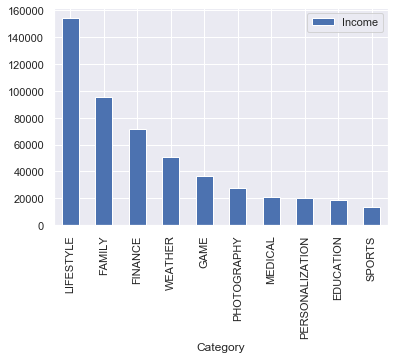

In [9]:
# drawing a plot of top10
top10.plot.bar(figsize=(6,4))
plt.show()

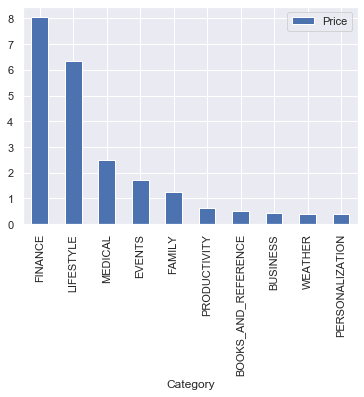

In [11]:
# drawing plot of the mean price of top 10 categories
top10=cleandf.groupby(by='Category')[['Price']].mean().sort_values(by='Price', ascending=False).head(10)
top10.plot.bar(figsize=(6,4))

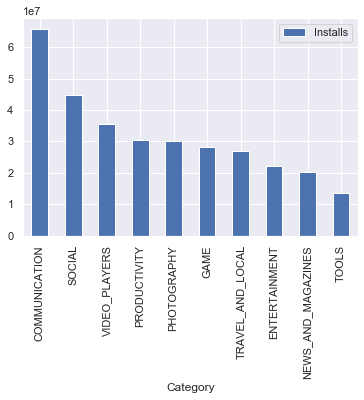

In [12]:
# drawing plot of the mean nb of installs of top 10 categories
top10=cleandf.groupby(by='Category')[['Installs']].mean().sort_values(by='Installs', ascending=False).head(10)
top10.plot.bar(figsize=(6,4))

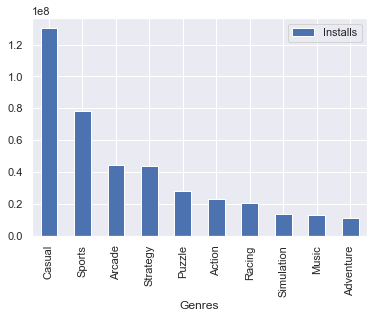

In [14]:
# drawing plot of the mean nb of installs of top 10 genres
gamestop10=cleangames.groupby(by='Genres')[['Installs']].mean().sort_values(by='Installs', ascending=False).head(10)
gamestop10.plot.bar(figsize=(6,4))

,Installs
App,
Subway Surfers,1.000000e+09
Pou,5.000000e+08
Temple Run 2,5.000000e+08
Candy Crush Saga,5.000000e+08
My Talking Tom,5.000000e+08
Modern Combat 5: eSports FPS,1.000000e+08
Minion Rush: Despicable Me Official Game,1.000000e+08
Angry Birds Classic,1.000000e+08
Angry Birds 2,1.000000e+08


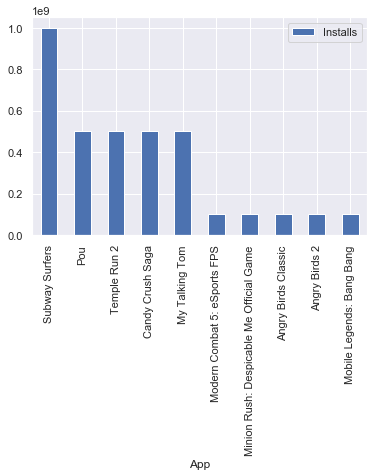

In [16]:
gamestop10titles=cleangames.groupby(by='App')[['Installs']].mean().sort_values(by='Installs', ascending=False).head(10)
gamestop10titles.plot.bar(figsize=(6,4))
gamestop10titles

,Price
Android Ver,
1.5 and up,0.000000
1.6 and up,0.000000
2.0 and up,0.247500
2.0.1 and up,0.000000
2.1 and up,0.110556
2.2 - 7.1.1,0.000000
2.2 and up,0.536154
2.3 and up,0.262249
2.3.3 and up,0.479111


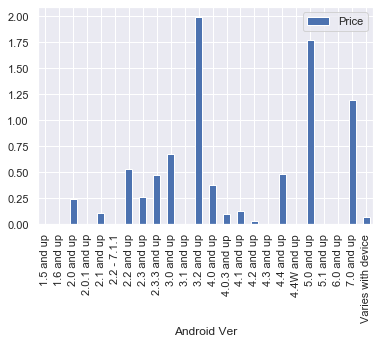

In [17]:
gamestop10titles=cleangames.groupby(by='Android Ver')[['Price']].mean()
gamestop10titles.plot.bar(figsize=(6,4))
gamestop10titles

In [18]:
group=cleandf.groupby(by='Category')[['Price','Installs','Income']].mean().head(10)
group.head(10)

,Price,Installs,Income
Category,,,
ART_AND_DESIGN,0.091846,1.912894e+06,489.846154
AUTO_AND_VEHICLES,0.158471,6.250613e+05,1178.217647
BEAUTY,0.000000,5.131519e+05,0.000000
BOOKS_AND_REFERENCE,0.520739,8.332476e+06,392.290174
BUSINESS,0.410515,2.022634e+06,2460.288642
COMICS,0.000000,9.347692e+05,0.000000
COMMUNICATION,0.227158,6.598983e+07,11604.821038
DATING,0.160357,1.053756e+06,450.823980
EDUCATION,0.138154,4.107323e+06,18492.153846


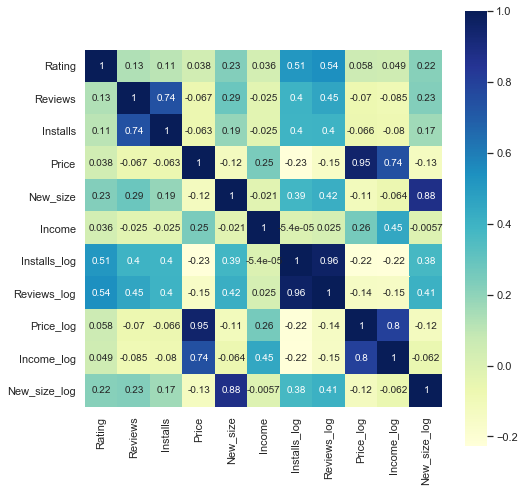

In [35]:
# checking the correlations on games apps (for the matter of visibility I will get rid of dummies for this chart)
cleangames_wo_dummies = cleangames.drop(columns=['Action','Adventure','Arcade','Board','Card','Casino','Casual','Music','Puzzle','Racing','Role Playing','Simulation','Sports','Strategy','Trivia','Word']);

plt.figure(figsize=(8, 8))
sns.heatmap(cleangames_wo_dummies.corr(), annot=True, square=True,cmap="YlGnBu")

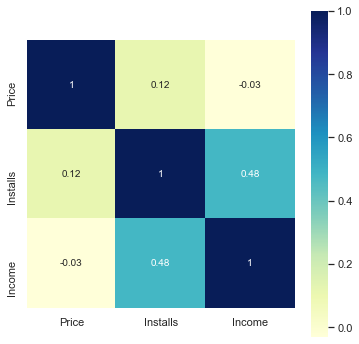

In [36]:
plt.figure(figsize=(6, 6))
sns.heatmap(group.corr(), annot=True, square=True,cmap="YlGnBu")
#no linear correlation raises questions in my head

In [41]:
#I will separate free apps
df2 = cleandf.loc[(df['Price'] != 0)]
group2=df2.groupby(by='Category')[['Price','Installs','Income']].mean().head(10)
group2.sort_values(by='Installs', ascending=False).head(10)

,Price,Installs,Income
Category,,,
COMMUNICATION,0.227158,6.598983e+07,11604.821038
ENTERTAINMENT,0.071892,2.212306e+07,7189.189189
BOOKS_AND_REFERENCE,0.520739,8.332476e+06,392.290174
EDUCATION,0.138154,4.107323e+06,18492.153846
BUSINESS,0.410515,2.022634e+06,2460.288642
ART_AND_DESIGN,0.091846,1.912894e+06,489.846154
DATING,0.160357,1.053756e+06,450.823980
COMICS,0.000000,9.347692e+05,0.000000
AUTO_AND_VEHICLES,0.158471,6.250613e+05,1178.217647


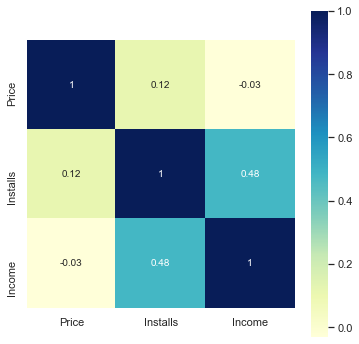

In [39]:
plt.figure(figsize=(6, 6))
sns.heatmap(group2.corr(), annot=True, square=True,cmap="YlGnBu")

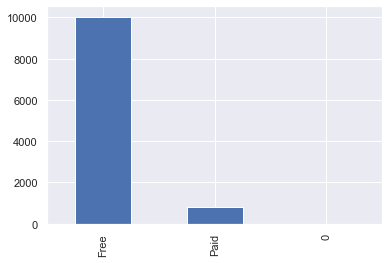

In [44]:
#Free vs paid
df.Type.value_counts().plot.bar()

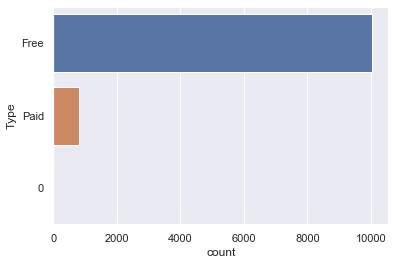

In [45]:
#same with sns:
sns.countplot(y=df.Type)

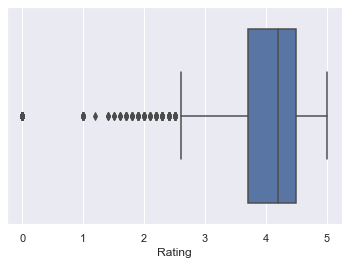

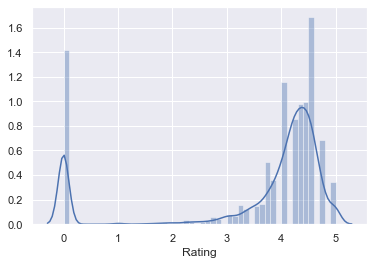

In [47]:
#
sns.boxplot(cleandf['Rating'])
plt.show()
sns.distplot(cleandf.Rating)
plt.show()

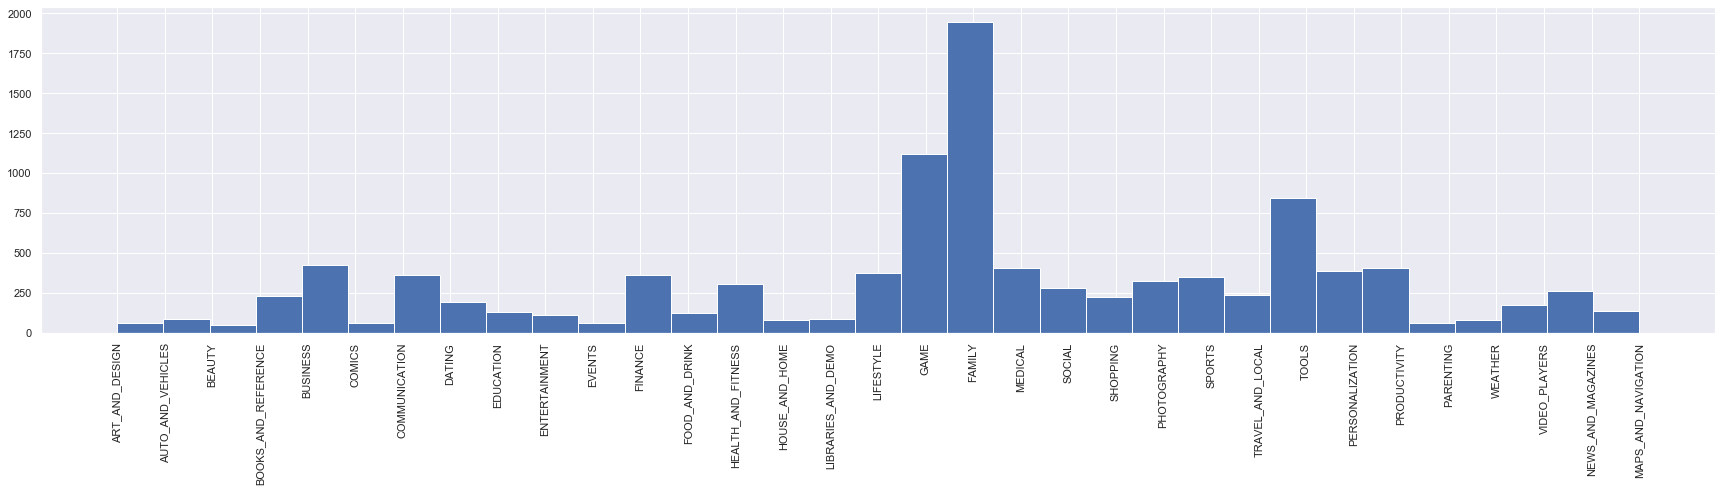

In [49]:
#
plt.figure(figsize=(30,6))
plt.hist(cleandf['Category'], bins = len(cleandf['Category'].value_counts()))
plt.xticks(rotation=90)
plt.show()

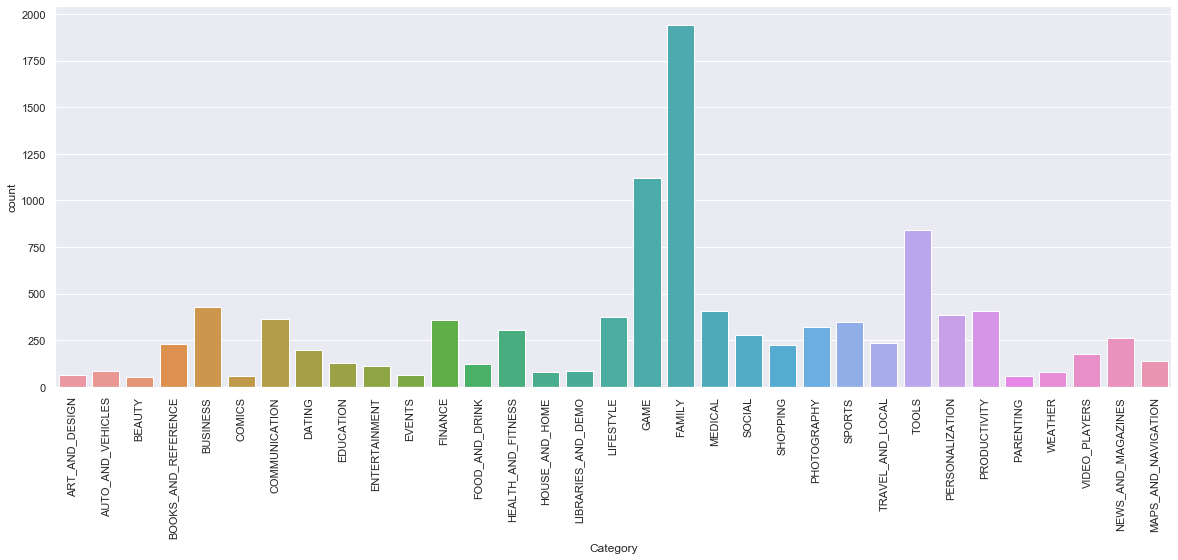

In [51]:
plt.figure(figsize=(20,7))
sns.countplot(cleandf['Category'], label = "Category")
#plt.legend(loc= 'best')
plt.xticks(rotation= 90)
plt.show()

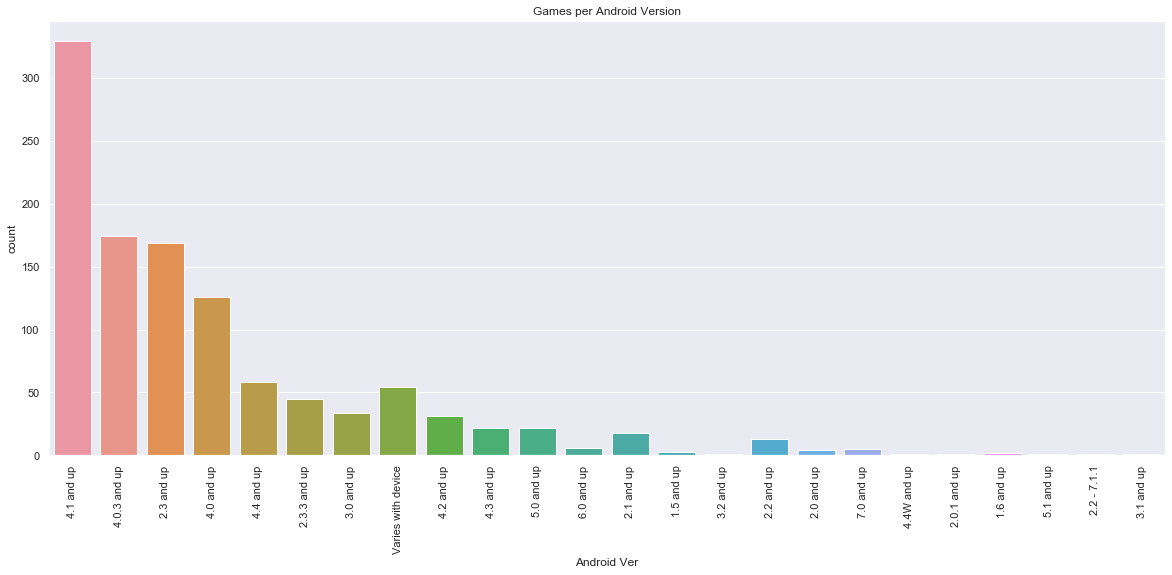

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(cleangames['Android Ver'])
plt.xticks(rotation = 90)
plt.title('Games per Android Version')
plt.show()

In [54]:
cleandf.loc[(cleandf['Category'] == 'GAME') & (cleandf['New_version'] == '7.0')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
5081,Flat Pack,GAME,4.4,862,44M,100000.0,Free,0.00,Everyone 10+,Action,2018-03-16,1.0.4,7.0 and up,45056.0,7.0,0.0,11.512925,6.759255,0.000000,0.000000,10.715661
5082,Crayola Color Blaster,GAME,3.8,17,30M,1000.0,Free,0.00,Everyone,Arcade,2018-03-13,1.5,7.0 and up,30720.0,7.0,0.0,6.907755,2.833213,0.000000,0.000000,10.332669
5100,Nightenfell: Shared AR,GAME,4.5,20,65M,1000.0,Paid,0.99,Everyone 10+,Action,2018-03-27,1.0.0,7.0 and up,66560.0,7.0,990.0,6.907755,2.995732,-0.010050,6.897705,11.105859
6683,ARK: Survival Evolved,GAME,3.8,51523,36M,500000.0,Free,0.00,Teen,Adventure,2018-08-02,1.0.90,7.0 and up,36864.0,7.0,0.0,13.122363,10.849784,0.000000,0.000000,10.514991
8306,Dr. Splorchy Presents Space Heroes,GAME,4.6,18,31M,100.0,Paid,4.99,Mature 17+,Adventure,2018-07-23,1.0,7.0 and up,31744.0,7.0,499.0,4.605170,2.890372,1.607436,6.212606,10.365459


In [57]:
df2 = cleandf.loc[(df['Category'] == 'GAME')]
group2=df2.groupby(by='App')[['Installs']].mean().head(10)
group2.sort_values(by='Installs', ascending=False).head(10)

,Installs
App,
8 Ball Pool,100000000.0
1LINE – One Line with One Touch,10000000.0
3D DJ – DJ Mixer 2018,1000000.0
30 Day Ab Challenge,500000.0
3D Color by Number with Voxels,500000.0
4K Ultra Camera,100000.0
3G DZ Configuration,50000.0
2-Player Co-op Zombie Shoot,1000.0
2017 EMRA Antibiotic Guide,1000.0


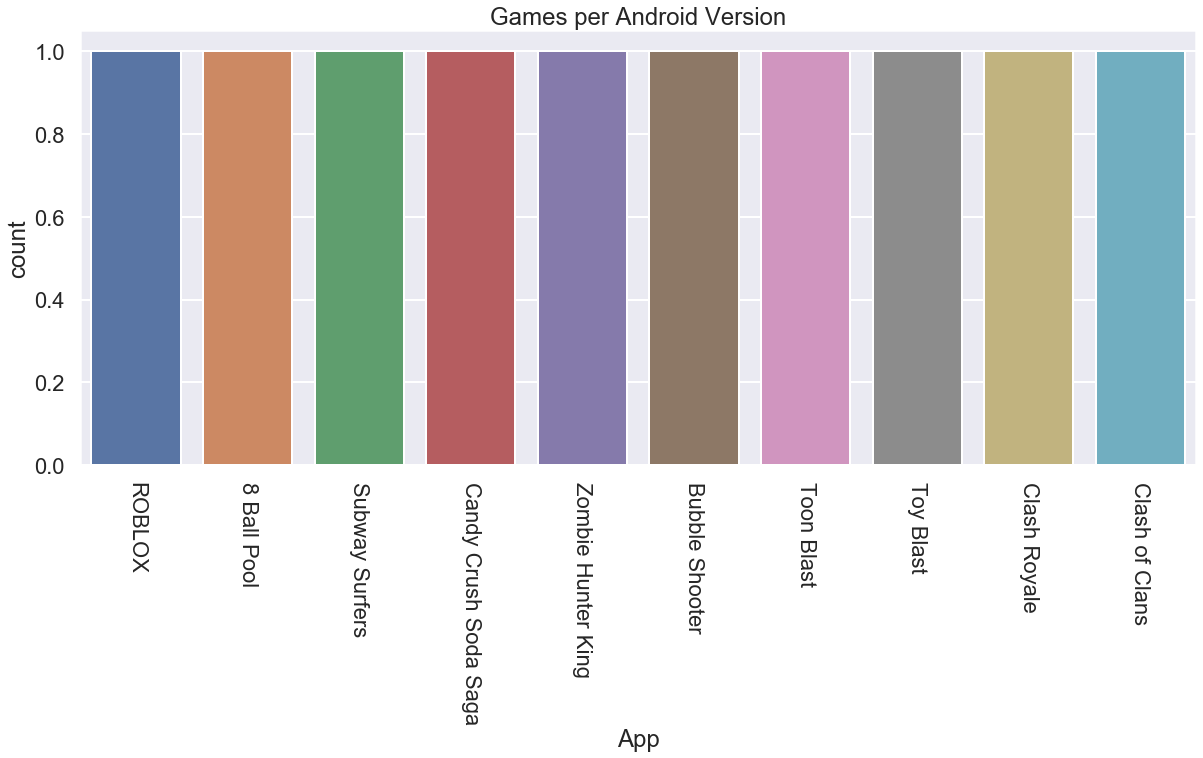

In [58]:
plt.figure(figsize=(20,8))
sns.countplot(df2.App.head(10))
plt.xticks(rotation = -90)
plt.title('Games per Android Version')
plt.show()

In [59]:
pd.set_option('max_columns', 50)
cleandf.loc[(cleandf.Price > 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
3745,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,1536.0,7.0,39999.0,4.605170,1.791759,5.991440,10.596610,7.336937
3908,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,26624.0,4.4,3999900.0,9.210340,6.576470,5.991440,15.201780,10.189568
3913,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,7475.2,4.1,4000000.0,9.210340,5.616771,5.991465,15.201805,8.919346
4895,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,1843.2,4.0.3,39999000.0,11.512925,8.173857,5.991440,17.504365,7.519258
4898,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,8908.8,4.4,3999900.0,9.210340,6.752270,5.991440,15.201780,9.094795
4899,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000.0,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,2662.4,4.3,2999900.0,9.210340,6.018593,5.703749,14.914090,7.886983
4900,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,4812.8,4.0,19999500.0,10.819778,7.532088,5.991440,16.811218,8.479034
4901,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000.0,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up,2969.6,4.0,379990.0,6.907755,3.713572,5.940145,12.847900,7.996183
4902,I am Rich!,FINANCE,3.8,93,22M,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,22528.0,4.1,399990.0,6.907755,4.532599,5.991440,12.899195,10.022514
4903,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,965.0,4.4,1999950.0,8.517193,6.156979,5.991440,14.508633,6.872128


In [60]:
cleandf.loc[(cleandf.Category == "COMMUNICATION")].sort_values(by=['Installs'], ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,0,0.0,20.723266,17.852276,0.0,0.0,NaN
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,0,0.0,20.723266,17.852342,0.0,0.0,NaN
3459,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,0,0.0,20.723266,18.051205,0.0,0.0,NaN
425,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,NaN,0,0.0,20.723266,15.045009,0.0,0.0,NaN
3701,Hangouts,COMMUNICATION,4.0,3419464,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,NaN,0,0.0,20.723266,15.044994,0.0,0.0,NaN
412,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,NaN,0,0.0,20.723266,15.342541,0.0,0.0,NaN
375,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,NaN,0,0.0,20.723266,16.081747,0.0,0.0,NaN
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,0,0.0,20.723266,18.051345,0.0,0.0,NaN
357,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,NaN,0,0.0,20.723266,16.165377,0.0,0.0,NaN
352,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,NaN,0,0.0,20.723266,15.044985,0.0,0.0,NaN


In [61]:
cleandf.loc[(cleandf.Category == "LIFESTYLE")].sort_values(by=['Income'], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
4895,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,1843.2,4.0.3,39999000.0,11.512925,8.173857,5.991440,17.504365,7.519258
5121,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000.0,Paid,5.99,Everyone,Lifestyle,2018-06-27,20180608,4.0 and up,872.0,4.0,5990000.0,13.815511,10.084391,1.790091,15.605602,6.770789
3913,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,7475.2,4.1,4000000.0,9.210340,5.616771,5.991465,15.201805,8.919346
3908,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,26624.0,4.4,3999900.0,9.210340,6.576470,5.991440,15.201780,10.189568
4899,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000.0,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up,2662.4,4.3,2999900.0,9.210340,6.018593,5.703749,14.914090,7.886983
4901,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000.0,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up,2969.6,4.0,379990.0,6.907755,3.713572,5.940145,12.847900,7.996183
6696,My Movies Pro - Movie & TV Collection Library,LIFESTYLE,4.6,6477,20M,10000.0,Paid,7.99,Everyone,Lifestyle,2018-07-16,2.26 Build 17,4.1 and up,20480.0,4.1,79900.0,9.210340,8.776013,2.078191,11.288531,9.927204
4904,I am Rich Person,LIFESTYLE,4.2,134,1.8M,1000.0,Paid,37.99,Everyone,Lifestyle,2017-07-18,1.0,4.0.3 and up,1843.2,4.0.3,37990.0,6.907755,4.897840,3.637323,10.545078,7.519258
4208,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000.0,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device,NaN,0,24900.0,9.210340,9.234935,0.912283,10.122623,NaN
4182,Kicker U,LIFESTYLE,4.1,124,37M,5000.0,Paid,3.99,Everyone,Lifestyle,2018-06-13,3.04,4.0.3 and up,37888.0,4.0.3,19950.0,8.517193,4.820282,1.383791,9.900984,10.542390


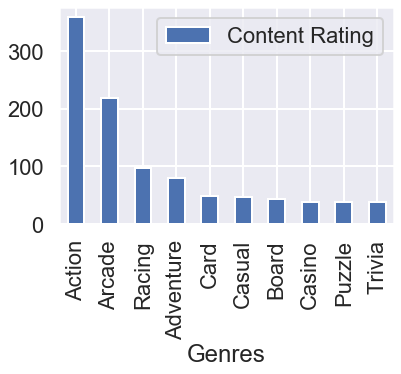

In [66]:
rating = cleangames.groupby(by='Genres')[['Content Rating']].count().sort_values(by='Content Rating', ascending=False).head(10)
rating.plot.bar(figsize=(6,4))

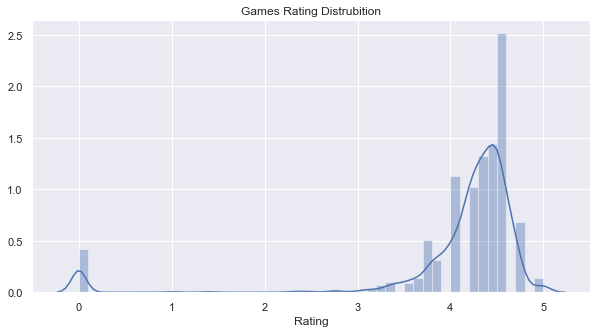

In [68]:
#histogram
plt.figure(figsize=(10,5))
sns.distplot(cleangames['Rating']);
plt.title("Games Rating Distrubition")
plt.show()

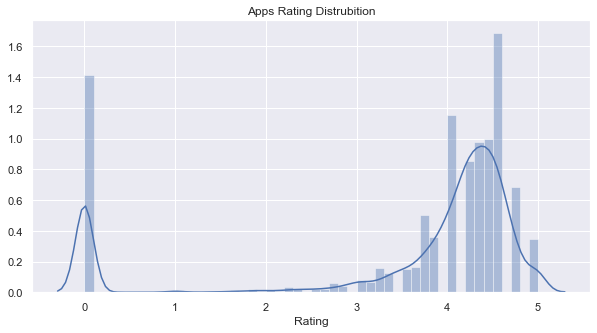

In [69]:
#histogram
plt.figure(figsize=(10,5))
sns.distplot(cleandf['Rating']);
plt.title("Apps Rating Distrubition")
plt.show()

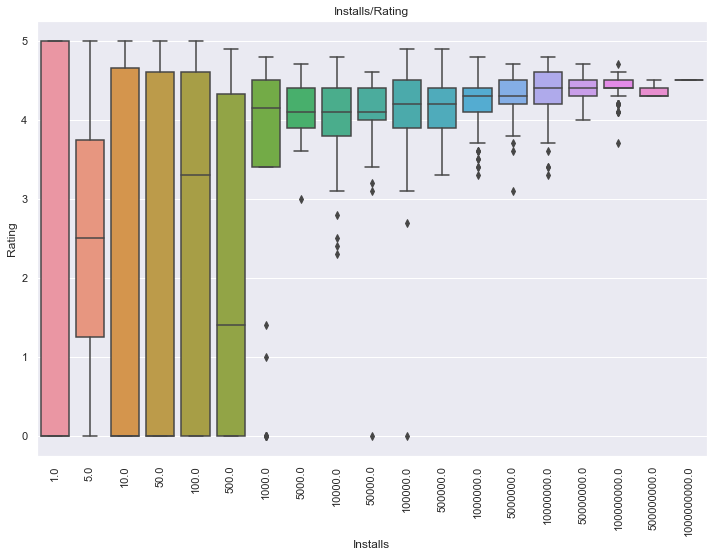

In [73]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(12,8))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=cleangames)
plt.title("Installs/Rating")
plt.xticks(rotation=90)
plt.show()

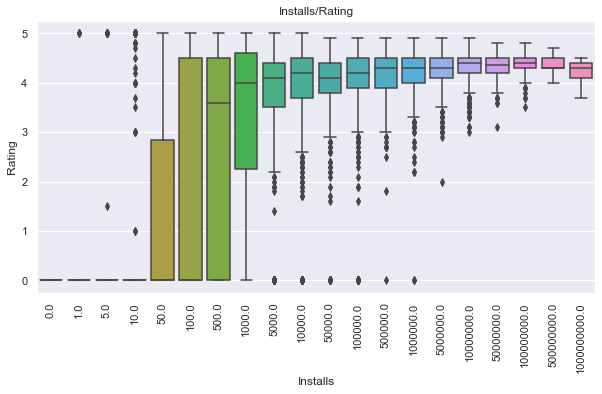

In [75]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(10,5))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=cleandf)
plt.title("Installs/Rating")
plt.xticks(rotation=90)
plt.show()

In [76]:
cleandf.loc[(cleandf.Type != "Free")].sort_values(by=['Installs'], ascending=False).head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,New_size,New_version,Income,Installs_log,Reviews_log,Price_log,Income_log,New_size_log
1983,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,...,1.5.2.1,Varies with device,NaN,0,69900000.0,16.118096,14.681166,1.944481,18.062576,NaN
3893,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,...,1.5.2.1,Varies with device,NaN,0,69900000.0,16.118096,14.680649,1.944481,18.062576,NaN
3587,Hitman Sniper,GAME,4.6,408292,29M,10000000.0,Paid,0.99,Mature 17+,Action,...,1.7.110758,4.1 and up,29696.0,4.1,9900000.0,16.118096,12.919738,-0.010050,16.108045,10.298768
2986,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,...,5.7.8,2.3 and up,14336.0,2.3,2490000.0,13.815511,11.491600,0.912283,14.727793,9.570529
5174,Five Nights at Freddy's,GAME,4.6,100805,50M,1000000.0,Paid,2.99,Teen,Action,...,1.85,2.3 and up,51200.0,2.3,2990000.0,13.815511,11.520943,1.095273,14.910784,10.843495
2988,HD Widgets,PERSONALIZATION,4.3,58617,26M,1000000.0,Paid,0.99,Everyone,Personalization,...,4.3.2,4.4 and up,26624.0,4.4,990000.0,13.815511,10.978780,-0.010050,13.805460,10.189568
6948,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000.0,Paid,6.99,Mature 17+,Action,...,1.08,3.0 and up,26624.0,3.0,6990000.0,13.815511,12.762718,1.944481,15.759991,10.189568
8323,DraStic DS Emulator,GAME,4.6,87766,12M,1000000.0,Paid,4.99,Everyone,Action,...,r2.5.0.3a,2.3 and up,12288.0,2.3,4990000.0,13.815511,11.382429,1.607436,15.422946,9.416378
8379,Bloons TD 5,FAMILY,4.6,190086,94M,1000000.0,Paid,2.99,Everyone,Strategy,...,3.16,2.3.3 and up,96256.0,2.3.3,2990000.0,13.815511,12.155232,1.095273,14.910784,11.474767
3806,Cut the Rope GOLD,FAMILY,4.6,61264,43M,1000000.0,Paid,0.99,Everyone,Puzzle,...,3.7.0,4.1 and up,44032.0,4.1,990000.0,13.815511,11.022948,-0.010050,13.805460,10.692672


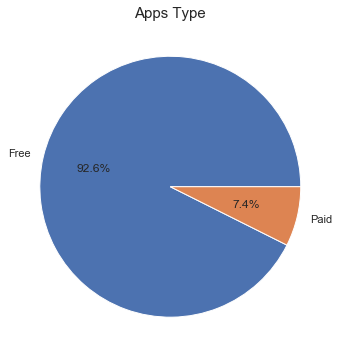

In [78]:
labels = cleandf.Type.value_counts().index
explode = [0,0]
sizes = cleandf.Type.value_counts().values

# visual 
plt.figure(0,figsize = (6,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Apps Type',fontsize = 15)
plt.show()

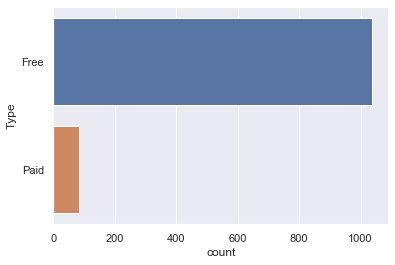

In [79]:
sns.countplot(y=cleangames.Type)